# Stock purchase recommendations with Machine Learning

In [124]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook # progress bar
import fastparquet

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [125]:
pd.set_option('display.max_columns', 1500)

## Machine Learning

In [126]:
# load the df_Xy dataframe from feature engineering step:
df_Xy = fastparquet.ParquetFile('../data/interim/df_Xy_all_tickers_final.parq').to_pandas()

# split df into features and target (column setup_for_profitable_trade)
df_X = df_Xy.drop(columns=['setup_for_profitable_trade'])
df_y = df_Xy['setup_for_profitable_trade']

df_X.shape

(102, 75)

### Build Model

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=False)

In [128]:
X_train.tail()

,AdjVolume_-1,AdjVolume_0,AdjOpen_-1,AdjOpen_0,AdjHigh_-1,AdjHigh_0,AdjLow_-1,AdjLow_0,AdjClose_-1,AdjClose_0,AdjCloseRSI14_-1,AdjCloseRSI14_0,RSI_above_80_-1,RSI_above_80_0,RSI_below_20_-1,RSI_below_20_0,AdjCloseSMA10_-1,AdjCloseSMA10_0,AdjCloseSMA10_to_AdjClose_ratio_-1,AdjCloseSMA10_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA10_-1,AdjClose_above_AdjCloseSMA10_0,AdjClose_crossed_AdjCloseSMA10_-1,AdjClose_crossed_AdjCloseSMA10_0,AdjCloseSMA50_-1,AdjCloseSMA50_0,AdjCloseSMA50_to_AdjClose_ratio_-1,AdjCloseSMA50_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA50_-1,AdjClose_above_AdjCloseSMA50_0,AdjClose_crossed_AdjCloseSMA50_-1,AdjClose_crossed_AdjCloseSMA50_0,AdjCloseSMA200_-1,AdjCloseSMA200_0,AdjCloseSMA200_to_AdjClose_ratio_-1,AdjCloseSMA200_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA200_-1,AdjClose_above_AdjCloseSMA200_0,AdjClose_crossed_AdjCloseSMA200_-1,AdjClose_crossed_AdjCloseSMA200_0,AdjCloseSMA50_to_AdjCloseSMA200_ratio_-1,AdjCloseSMA50_to_AdjCloseSMA200_ratio_0,AdjCloseSMA200_above_AdjCloseSMA50_-1,AdjCloseSMA200_above_AdjCloseSMA50_0,AdjCloseSMA200_crossed_AdjCloseSMA50_-1,AdjCloseSMA200_crossed_AdjCloseSMA50_0,AdjCloseSMA10_to_AdjCloseSMA50_ratio_-1,AdjCloseSMA10_to_AdjCloseSMA50_ratio_0,AdjCloseSMA50_above_AdjCloseSMA10_-1,AdjCloseSMA50_above_AdjCloseSMA10_0,AdjCloseSMA50_crossed_AdjCloseSMA10_-1,AdjCloseSMA50_crossed_AdjCloseSMA10_0,AdjVolume_chg_-1,AdjVolume_chg_0,AdjOpen_chg_-1,AdjOpen_chg_0,AdjLow_chg_-1,AdjLow_chg_0,AdjHigh_chg_-1,AdjHigh_chg_0,AdjClose_chg_-1,AdjClose_chg_0,AdjCloseSMA10_chg_-1,AdjCloseSMA10_chg_0,AdjCloseSMA50_chg_-1,AdjCloseSMA50_chg_0,AdjCloseSMA200_chg_-1,AdjCloseSMA200_chg_0,year,month,week,weekday,day,AAPL.US,INTC.US
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-12-12,1.371454,1.0,1.008643,1.0,1.009959,1.0,0.999393,1.0,1.001463,1.0,0.649227,0.641793,False,False,False,False,0.997406,1.0,0.998618,1.002680,True,False,False,True,0.997173,1.0,0.927869,0.931860,True,True,False,False,0.998620,1.0,0.821593,0.823932,True,True,False,False,1.129353,1.130991,False,False,False,False,1.076250,1.075998,False,False,False,False,0.292699,-0.270847,0.006068,-0.008569,-0.002691,0.000607,0.005441,-0.009860,-0.007409,-0.001461,0.005013,0.002601,0.002936,0.002835,0.001359,0.001382,2013,12,50,3,12,1,0
2013-12-12,1.126135,1.0,1.000809,1.0,0.999598,1.0,0.999181,1.0,0.997957,1.0,0.536481,0.543418,False,False,False,False,0.997650,1.0,0.990909,0.991214,True,True,False,False,0.998496,1.0,0.976961,0.976434,True,True,False,False,0.999090,1.0,0.939066,0.938000,True,True,False,False,1.040354,1.040974,False,False,False,False,1.014277,1.015136,False,False,False,False,0.355900,-0.112007,-0.006027,-0.000808,-0.010543,0.000820,-0.003604,0.000402,-0.016116,0.002048,0.003192,0.002356,0.001513,0.001507,0.000890,0.000910,2013,12,50,3,12,0,1
2013-12-13,0.788079,1.0,0.998741,1.0,1.004370,1.0,1.011487,1.0,1.011020,1.0,0.641793,0.587786,False,False,False,False,1.000292,1.0,1.002680,1.013434,False,False,True,False,0.997181,1.0,0.931860,0.944793,True,True,False,False,0.998572,1.0,0.823932,0.834203,True,True,False,False,1.130991,1.132569,False,False,False,False,1.075998,1.072652,False,False,False,False,-0.270847,0.268908,-0.008569,0.001260,0.000607,-0.011357,-0.009860,-0.004351,-0.001461,-0.010900,0.002601,-0.000292,0.002835,0.002827,0.001382,0.001430,2013,12,50,4,13,1,0
2013-12-13,1.062362,1.0,1.021277,1.0,1.016333,1.0,1.010971,1.0,1.007410,1.0,0.543418,0.513619,False,False,False,False,0.998148,1.0,0.991214,1.000412,True,False,False,True,0.998412,1.0,0.976434,0.985234,True,True,False,False,0.999162,1.0,0.938000,0.945744,True,True,False,False,1.040974,1.041756,False,False,False,False,1.015136,1.015405,False,False,False,False,-0.112007,-0.058701,-0.000808,-0.020833,0.000820,-0.010852,0.000402,-0.016071,0.002048,-0.007356,0.002356,0.001855,0.001507,0.001590,0.000910,0.000839,2013,12,50,4,13,0,1
2013-12-16,1.177744,1.0,1.014108,1.0,1.000429,1.0,0.997586,1.0,0.994493,1.0,0.587786,0.605739,False,

In [129]:
X_test.head()

,AdjVolume_-1,AdjVolume_0,AdjOpen_-1,AdjOpen_0,AdjHigh_-1,AdjHigh_0,AdjLow_-1,AdjLow_0,AdjClose_-1,AdjClose_0,AdjCloseRSI14_-1,AdjCloseRSI14_0,RSI_above_80_-1,RSI_above_80_0,RSI_below_20_-1,RSI_below_20_0,AdjCloseSMA10_-1,AdjCloseSMA10_0,AdjCloseSMA10_to_AdjClose_ratio_-1,AdjCloseSMA10_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA10_-1,AdjClose_above_AdjCloseSMA10_0,AdjClose_crossed_AdjCloseSMA10_-1,AdjClose_crossed_AdjCloseSMA10_0,AdjCloseSMA50_-1,AdjCloseSMA50_0,AdjCloseSMA50_to_AdjClose_ratio_-1,AdjCloseSMA50_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA50_-1,AdjClose_above_AdjCloseSMA50_0,AdjClose_crossed_AdjCloseSMA50_-1,AdjClose_crossed_AdjCloseSMA50_0,AdjCloseSMA200_-1,AdjCloseSMA200_0,AdjCloseSMA200_to_AdjClose_ratio_-1,AdjCloseSMA200_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA200_-1,AdjClose_above_AdjCloseSMA200_0,AdjClose_crossed_AdjCloseSMA200_-1,AdjClose_crossed_AdjCloseSMA200_0,AdjCloseSMA50_to_AdjCloseSMA200_ratio_-1,AdjCloseSMA50_to_AdjCloseSMA200_ratio_0,AdjCloseSMA200_above_AdjCloseSMA50_-1,AdjCloseSMA200_above_AdjCloseSMA50_0,AdjCloseSMA200_crossed_AdjCloseSMA50_-1,AdjCloseSMA200_crossed_AdjCloseSMA50_0,AdjCloseSMA10_to_AdjCloseSMA50_ratio_-1,AdjCloseSMA10_to_AdjCloseSMA50_ratio_0,AdjCloseSMA50_above_AdjCloseSMA10_-1,AdjCloseSMA50_above_AdjCloseSMA10_0,AdjCloseSMA50_crossed_AdjCloseSMA10_-1,AdjCloseSMA50_crossed_AdjCloseSMA10_0,AdjVolume_chg_-1,AdjVolume_chg_0,AdjOpen_chg_-1,AdjOpen_chg_0,AdjLow_chg_-1,AdjLow_chg_0,AdjHigh_chg_-1,AdjHigh_chg_0,AdjClose_chg_-1,AdjClose_chg_0,AdjCloseSMA10_chg_-1,AdjCloseSMA10_chg_0,AdjCloseSMA50_chg_-1,AdjCloseSMA50_chg_0,AdjCloseSMA200_chg_-1,AdjCloseSMA200_chg_0,year,month,week,weekday,day,AAPL.US,INTC.US
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-12-16,0.823236,1.0,0.994862,1.0,0.991097,1.0,0.992807,1.0,0.993456,1.0,0.513619,0.537877,False,False,False,False,0.996923,1.0,1.000412,0.996933,False,True,True,True,0.998455,1.0,0.985234,0.980301,True,True,False,False,0.999179,1.0,0.945744,0.940327,True,True,False,False,1.041756,1.042511,False,False,False,False,1.015405,1.016965,False,False,False,False,-0.058701,0.214718,-0.020833,0.005164,-0.010852,0.007245,-0.016071,0.008983,-0.007356,0.006587,0.001855,0.003086,0.001590,0.001547,0.000839,0.000822,2013,12,51,0,16,0,1
2013-12-17,1.229186,1.0,0.998579,1.0,1.005718,1.0,1.002955,1.0,1.004523,1.0,0.605739,0.583369,False,False,False,False,1.002019,1.0,1.008978,1.011499,False,False,False,False,0.997339,1.0,0.942363,0.949150,True,True,False,False,0.998577,1.0,0.830914,0.835861,True,True,False,False,1.134128,1.135536,False,False,False,False,1.070690,1.065690,False,False,False,False,-0.150919,-0.186453,-0.013911,0.001423,0.002420,-0.002946,-0.000428,-0.005686,0.005537,-0.004502,0.001116,-0.002015,0.002951,0.002668,0.001572,0.001425,2013,12,51,1,17,1,0
2013-12-17,0.890001,1.0,0.996314,1.0,0.997578,1.0,0.997949,1.0,0.991685,1.0,0.537877,0.567631,False,False,False,False,0.995487,1.0,0.996933,0.993125,True,True,True,False,0.998303,1.0,0.980301,0.973803,True,True,False,False,0.999186,1.0,0.940327,0.933268,True,True,False,False,1.042511,1.043432,False,False,False,False,1.016965,1.019842,False,False,False,False,0.214718,0.123594,0.005164,0.003699,0.007245,0.002055,0.008983,0.002428,0.006587,0.008384,0.003086,0.004533,0.001547,0.001700,0.000822,0.000815,2013,12,51,1,17,0,1
2013-12-18,0.406286,1.0,1.011115,1.0,1.014489,1.0,1.027051,1.0,1.007662,1.0,0.583369,0.546806,False,False,False,False,1.002541,1.0,1.011499,1.016666,False,False,False,False,0.997250,1.0,0.949150,0.959060,True,True,False,False,0.998567,1.0,0.835861,0.843474,True,True,False,False,1.135536,1.137036,False,False,False,False,1.065690,1.060065,False,False,False,False,-0.186453,1.461319,0.001423,-0.010993,-0.002946,-0.026338,-0.005686,-0.014282,-0.004502,-0.007604,-0.002015,-0.002535,0.002668,0.002758,0.001425,0.001435,2013,12,51,2,18,1,0
2013-12-18,0.659751,1.0,0.988264,1.0,0.982937,1.0,0.993885,1.0,0.980318,1.0,0.567631,0.629641,False,Fal

In [130]:
pipeline = Pipeline([
    ('standardScaler', StandardScaler()),
    ('randomForest', RandomForestClassifier())
])
pipeline.get_params()

{'memory': None,
 'randomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'randomForest__bootstrap': True,
 'randomForest__class_weight': None,
 'randomForest__criterion': 'gini',
 'randomForest__max_depth': None,
 'randomForest__max_features': 'auto',
 'randomForest__max_leaf_nodes': None,
 'randomForest__min_impurity_decrease': 0.0,
 'randomForest__min_impurity_split': None,
 'randomForest__min_samples_leaf': 1,
 'randomForest__min_samples_split': 2,
 'randomForest__min_weight_fraction_leaf': 0.0,
 'randomForest__n_estimators': 'warn',
 'randomForest__n_jobs': None,
 'randomForest__oob_score': F

In [131]:
pipeline.fit(X_train, y_train)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('standardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [132]:
y_pred = pipeline.predict(X_test)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.75      0.86        20
        True       0.17      1.00      0.29         1

   micro avg       0.76      0.76      0.76        21
   macro avg       0.58      0.88      0.57        21
weighted avg       0.96      0.76      0.83        21



In [134]:
accuracy_score(y_test, y_pred)

0.7619047619047619

In [135]:
confusion_matrix(y_test, y_pred, labels=[False, True])

array([[15,  5],
       [ 0,  1]], dtype=int64)

In [136]:
def print_feature_importances(estimator):

    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print(str(f + 1) + " importance: " + str(importances[indices[f]]) + ". feature name: " + X_train.columns[indices[f]])
        
print_feature_importances(pipeline.named_steps['randomForest'])

Feature ranking:
1 importance: 0.18536883541131538. feature name: AdjCloseRSI14_0
2 importance: 0.08366961954741604. feature name: AdjCloseSMA10_chg_0
3 importance: 0.07072300372727665. feature name: AdjCloseSMA50_to_AdjClose_ratio_0
4 importance: 0.0678385176731028. feature name: AdjCloseRSI14_-1
5 importance: 0.0575803539209903. feature name: AdjLow_chg_0
6 importance: 0.05062288287477608. feature name: AdjCloseSMA50_to_AdjClose_ratio_-1
7 importance: 0.04965577546681432. feature name: AdjCloseSMA200_to_AdjClose_ratio_0
8 importance: 0.03653496028596181. feature name: AdjCloseSMA50_chg_-1
9 importance: 0.035712129389088264. feature name: AdjCloseSMA50_-1
10 importance: 0.034108365592134995. feature name: AdjCloseSMA10_chg_-1
11 importance: 0.02715615605503896. feature name: AdjVolume_-1
12 importance: 0.025185677406640922. feature name: weekday
13 importance: 0.02242132867132867. feature name: week
14 importance: 0.022085463796049514. feature name: AdjHigh_-1
15 importance: 0.0185111

### Improve RandomForest model

In [137]:
parameters = {
    'randomForest__min_samples_leaf': [1, 2, 5, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='f1', n_jobs=-1, verbose=6)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    8.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.2s finished
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'randomForest__min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=6)

In [138]:
cv.best_params_

{'randomForest__min_samples_leaf': 10}

In [139]:
print_feature_importances(cv.best_estimator_.named_steps['randomForest'])

Feature ranking:
1 importance: 0.2451279495805218. feature name: AdjCloseRSI14_-1
2 importance: 0.09156908665105387. feature name: AdjCloseRSI14_0
3 importance: 0.078418385534674. feature name: AdjCloseSMA50_to_AdjClose_ratio_0
4 importance: 0.07375189107413012. feature name: AdjCloseSMA10_to_AdjCloseSMA50_ratio_-1
5 importance: 0.06884721464129283. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_0
6 importance: 0.068000554453208. feature name: AdjCloseSMA10_-1
7 importance: 0.06278912201373787. feature name: AdjLow_chg_0
8 importance: 0.06006561479918411. feature name: AdjCloseSMA200_to_AdjClose_ratio_0
9 importance: 0.05888407426084056. feature name: AdjOpen_chg_-1
10 importance: 0.03834286152191259. feature name: AdjLow_-1
11 importance: 0.034785221646681755. feature name: AdjCloseSMA200_to_AdjClose_ratio_-1
12 importance: 0.02900413882401905. feature name: AdjCloseSMA200_chg_0
13 importance: 0.02804381751924634. feature name: AdjHigh_chg_-1
14 importance: 0.027869583757011172. 

In [140]:
y_pred = cv.predict(X_test)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.50      1.00      0.67         1

   micro avg       0.95      0.95      0.95        21
   macro avg       0.75      0.97      0.82        21
weighted avg       0.98      0.95      0.96        21



In [142]:
accuracy_score(y_test, y_pred)

0.9523809523809523

In [143]:
confusion_matrix(y_test, y_pred, labels=[False, True])

array([[19,  1],
       [ 0,  1]], dtype=int64)

In [144]:
y_pred

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

## next: add backtesting

In [161]:
# load the ticker list:
symbols = fastparquet.ParquetFile('../data/interim/symbols.parq').to_pandas().index.tolist()
    
print(symbols)

['AAPL.US', 'INTC.US']


In [162]:
# build dataframe with dates, stock tickers, real setup for profitable trade, and prediction
df_backtest = pd.concat([X_test.loc[:, symbols], y_test], axis=1)
df_backtest['setup_for_profitable_trade_prediction'] = y_pred
df_backtest.tail()

,AAPL.US,INTC.US,setup_for_profitable_trade,setup_for_profitable_trade_prediction
Index,,,,
2013-12-27,0,1,False,False
2013-12-30,1,0,False,True
2013-12-30,0,1,False,False
2013-12-31,0,1,False,False
2013-12-31,1,0,False,False


In [169]:
# load the df_downloaded_all_ticker dataframe from feature engineering step:
df_downloaded_all_tickers = fastparquet.ParquetFile('../data/interim/df_downloaded_all_tickers.parq').to_pandas()
df_downloaded_all_tickers.tail()

,AdjVolume,AdjOpen,AdjLow,AdjHigh,AdjClose,ticker
Index,,,,,,
2013-12-27,12970600.0,22.668300,22.430613,22.712316,22.536252,INTC.US
2013-12-30,63407400.0,74.098978,73.415889,74.448564,73.708186,AAPL.US
2013-12-30,19787200.0,22.597874,22.536252,22.756332,22.756332,INTC.US
2013-12-31,22808100.0,22.721120,22.685907,22.923594,22.848766,INTC.US
2013-12-31,55771100.0,73.661663,73.639066,74.606742,74.572182,AAPL.US


calculating backtest for: AAPL.US
            AAPL.US  setup_for_profitable_trade  \
Index                                             
2013-12-24        1                       False   
2013-12-26        1                       False   
2013-12-27        1                       False   
2013-12-30        1                       False   
2013-12-31        1                       False   

            setup_for_profitable_trade_prediction    AdjOpen   AdjClose  \
Index                                                                     
2013-12-24                                  False  75.751204  75.456116   
2013-12-26                                  False  75.513273  74.954999   
2013-12-27                                  False  74.944365  74.448564   
2013-12-30                                   True  74.098978  73.708186   
2013-12-31                                  False  73.661663  74.572182   

              AdjHigh     AdjLow   ticker  
Index                                 

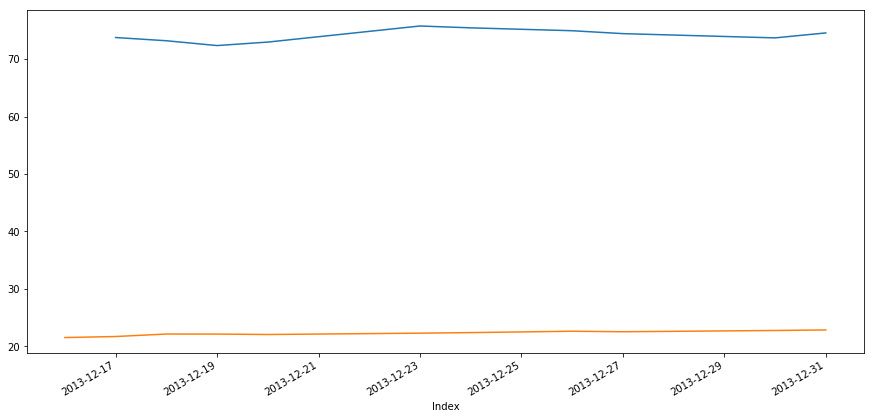

In [175]:
# cycle through all tickers and calculate performance of prediction for each
for ticker in tqdm_notebook(symbols):
    print('calculating backtest for: ' + ticker)
   
    # pull out all rows for current ticker 
    df_backtest_this_ticker = df_backtest.loc[df_backtest[ticker]==1, 
                                              [ticker, 'setup_for_profitable_trade', 'setup_for_profitable_trade_prediction']] 
    
    ##### 1) get the downloaded stock data for this ticker and for the dates that will be part of the backtest
       
    # pull out the data for current ticker
    df_downloaded_data_this_ticker = df_downloaded_all_tickers.loc[ df_downloaded_all_tickers['ticker']==ticker, :]
    # now ensure we only use the same dates as in the backtest for this ticker
    df_downloaded_data_this_ticker_backtest_dates = df_downloaded_data_this_ticker.loc[df_backtest_this_ticker.index, :]
    
    # ensure same dates in index
    assert (df_backtest_this_ticker.index == df_downloaded_data_this_ticker_backtest_dates.index).all
    # ensure we got the right rows from the downloaded data for this stock
    assert (ticker == df_downloaded_data_this_ticker_backtest_dates['ticker']).all
    
    # now that we know we have the right data, keep only most important columns
    df_downloaded_data_this_ticker_backtest_dates = df_downloaded_data_this_ticker_backtest_dates[['AdjOpen', 'AdjClose', 
                                                                                                  'AdjHigh', 'AdjLow', 'ticker']]
    

    # build dataframe that has downloaded data and prediction and true strategy result for backtest time period
    df_backtest_this_ticker_with_downloaded_data = df_backtest_this_ticker.join(df_downloaded_data_this_ticker_backtest_dates)
    
    print(df_backtest_this_ticker_with_downloaded_data.tail())
    df_backtest_this_ticker_with_downloaded_data['AdjClose'].plot(figsize=(15,7))

In [167]:
df_downloaded_all_tickers.loc[ df_downloaded_all_tickers['ticker']=='INTC.US', :].head()

,AdjVolume,AdjOpen,AdjLow,AdjHigh,AdjClose,ticker
Index,,,,,,
2013-10-18,29579100.0,20.809644,20.652656,20.914303,20.822727,INTC.US
2013-10-21,35297600.0,20.879417,20.770397,21.080013,21.049487,INTC.US
2013-10-22,29010800.0,21.080013,20.940468,21.106177,20.993669,INTC.US
2013-10-23,31651100.0,20.870695,20.547997,20.975354,20.700625,INTC.US
2013-10-24,47590200.0,20.809644,20.739872,20.905581,20.739872,INTC.US


## use TPOT